In [4]:
# 기본
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 경고 뜨지 않게...
import warnings
warnings.filterwarnings('ignore')

# 그래프 설정
# plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['font.size'] = 16
plt.rcParams['figure.figsize'] = 20, 10
plt.rcParams['axes.unicode_minus'] = False

# 시간 관리를 위한 라이브러리
import datetime

# 데이터 수집
from pandas_datareader import data
import requests
from bs4 import BeautifulSoup
import re
import time
import os
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import Select

# 화면 청소
from IPython.display import clear_output

# 데이터 전처리 알고리즘
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

# 학습용과 검증용으로 나누는 함수
from sklearn.model_selection import train_test_split

# 교차검증
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

# 하이퍼 파라미터 튜닝
from sklearn.model_selection import GridSearchCV

# 분류 알고리즘
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
# from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier

# 회귀 알고리즘
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
# from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import VotingRegressor

# 분류용 평가 함수
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

# 회귀용 평가 함수
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# 차원 축소
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# 군집
from sklearn.cluster import KMeans
from sklearn.cluster import MeanShift

# 시계열 분석
from pmdarima.arima import auto_arima
# from fbprophet import Prophet

# 형태소 분석도구
from soynlp.utils import DoublespaceLineCorpus
from soynlp.noun import LRNounExtractor_v2
from soynlp.noun import LRNounExtractor
from soynlp.noun import NewsNounExtractor

from konlpy.tag import Okt, Hannanum, Kkma, Mecab, Komoran

# 형태소 벡터를 생성하기 위한 라이브러리
from sklearn.feature_extraction.text import CountVectorizer
# 형태소 벡터를 학습 벡터로 변한하는 라이브러리
from sklearn.feature_extraction.text import TfidfTransformer


# 워드 클라우드
from collections import Counter
import pytagcloud
from IPython.display import Image

# 상관관계
from patsy import dmatrices
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# 추천
from surprise import SVD, Dataset, Reader, accuracy
from surprise.model_selection import train_test_split

pygame 2.1.2 (SDL 2.0.18, Python 3.9.7)
Hello from the pygame community. https://www.pygame.org/contribute.html


### 데이터 불러오기

In [5]:
df = pd.read_csv('data/used_mobile_phone.csv')
df

,create_date,price,text,phone_model,factory_price,maker,price_index
0,2017-03-19 4 35 00 PM,550000.0,아이폰6플러스 블랙+애플라이트 64기가 팝니다 아이폰6플러스 블랙+애플라이트 64...,iphone 6 64gb,924000,apple,95.96
1,2016-10-26 12 08 00 PM,380000.0,갤럭시s6엣지 32기가 팝니다 직거래 갤럭시s6엣지 32기가 품명 갤럭시s6엣지제...,galaxy s6 edge 32gb,979000,samsung,103.05
2,2016-10-25 12 52 00 PM,300000.0,갤럭시s6 풀박스로 팝니다~~~ 새상품급 실기스조차 없어요 직접거래 구매한지 1...,galaxy s6 32gb,854000,samsung,103.05
3,2017-03-23 11 14 00 PM,290000.0,sk g5 티탄 폰 단품판매합니다 직접거래 sk g5 티탄 폰 단품판매합니다 올...,lg g5 32gb,836000,lg,95.96
4,2016-04-11 7 35 00 PM,280000.0,sony 엑스페리아 c5 ultra e5506 16gb 미사용 새제품 팝니다 1...,lg u 32gb,396000,lg,102.59
...,...,...,...,...,...,...,...
4946,2016-10-10 11 29 00 AM,1300000.0,미개봉 언락폰 아이폰7플러스 256gb 골드 iphone7 plus 강북 도봉\t ...,iphone 7 plus 256gb,1283700,apple,103.05
4947,2016-10-24 10 03 00 PM,1300000.0,미국판 아이폰7 256g 제트블랙 강남역삼 2대 미개봉언락 애플 a1660 강남역삼...,iphone 7 256gb,1130800,apple,103.05
4948,2016-09-19 10 15 00 AM,1300000.0,"아이폰7 미개봉 홍콩판 팝니다 케이스,강화유리서비스 종류다양 아이폰7 917,91...",iphone 7 256gb,1130800,apple,103.05
4949,2016-10-05 12 22 00 AM,1350000.0,미개봉 언락폰 아이폰7플러스 256gb 골드 iphone7 plus 강북 도봉 미개...,iphone 7 plus 256gb,1283700,apple,103.05


In [6]:
df.info()
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4951 entries, 0 to 4950
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   create_date    4951 non-null   object 
 1   price          4951 non-null   float64
 2   text           4951 non-null   object 
 3   phone_model    4951 non-null   object 
 4   factory_price  4951 non-null   int64  
 5   maker          4951 non-null   object 
 6   price_index    4951 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 270.9+ KB


create_date      0
price            0
text             0
phone_model      0
factory_price    0
maker            0
price_index      0
dtype: int64

### create_date 특성 확인

In [7]:
# 월까지만 가져온다.
df['month'] = df['create_date'].str[:7]
df['month']

0       2017-03
1       2016-10
2       2016-10
3       2017-03
4       2016-04
         ...   
4946    2016-10
4947    2016-10
4948    2016-09
4949    2016-10
4950    2016-09
Name: month, Length: 4951, dtype: object

In [8]:
df['month'].value_counts()

2016-10    2956
2017-03    1311
2016-08     107
2016-09     105
2016-04     102
2016-05      89
2016-06      76
2016-07      74
2016-03      70
2016-02      61
Name: month, dtype: int64

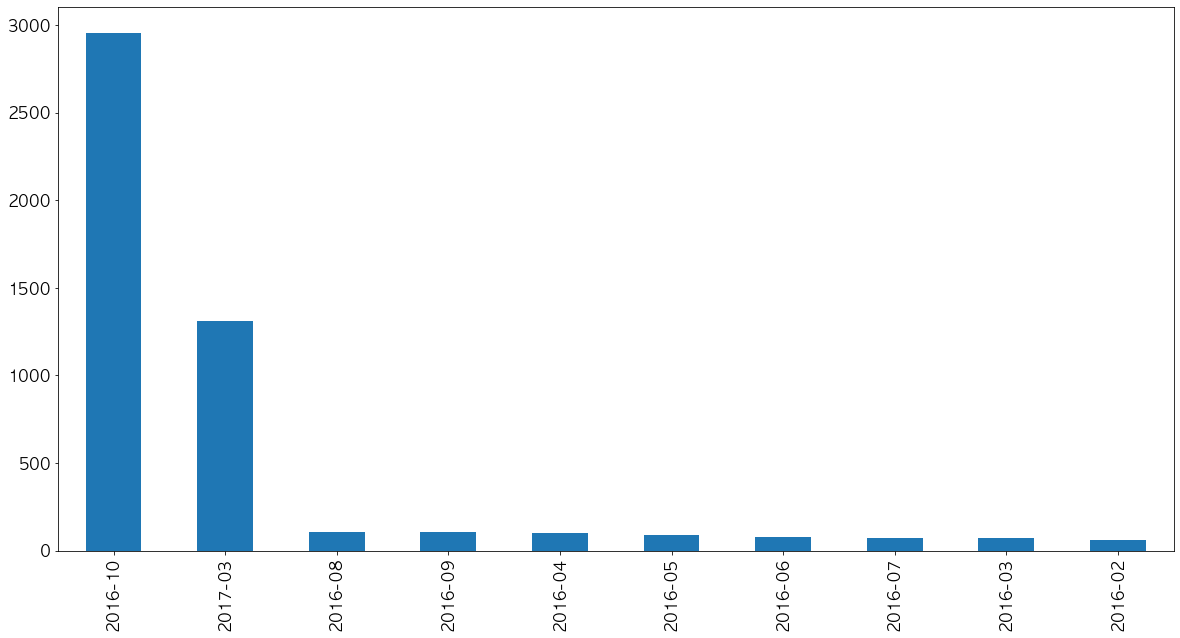

In [9]:
# 월별 글 수를 시각화 한다.
a1 = df['month'].value_counts()
a1.plot.bar()
plt.show()

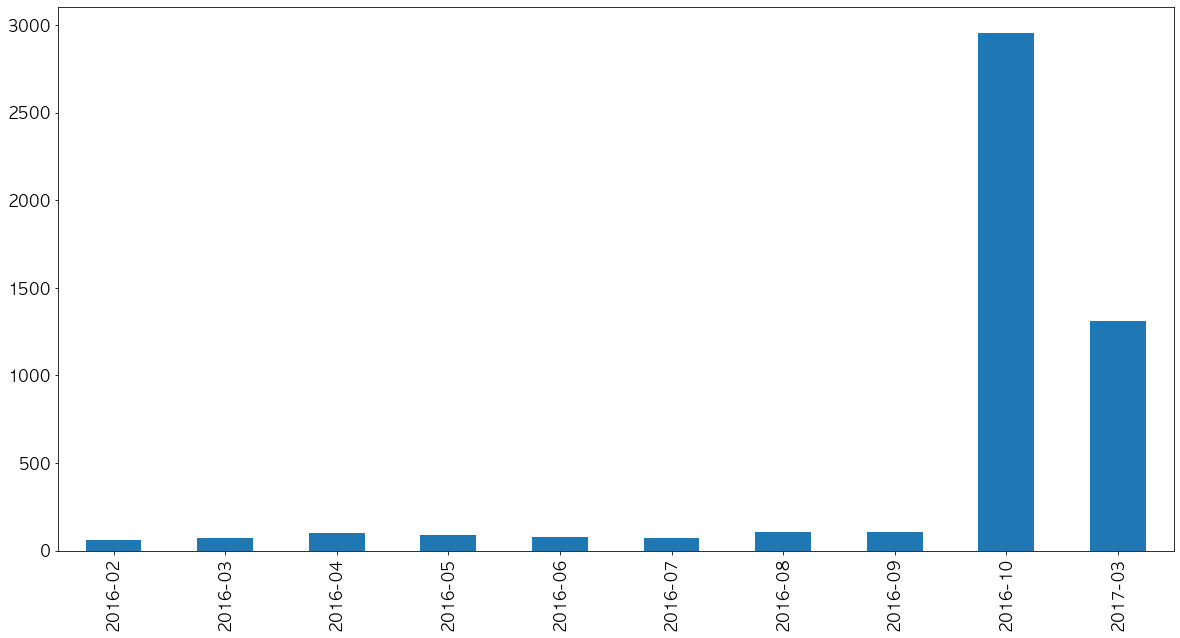

In [10]:
# 월별 글 수를 시각화 한다.
a1 = df['month'].value_counts()
# value_counts 함수를 쓰면 값을 기준으로 내림차순 정렬된다.
# 인덱스를 기준으로 정렬한다.
a1.sort_index(inplace=True)

a1.plot.bar()
plt.show()

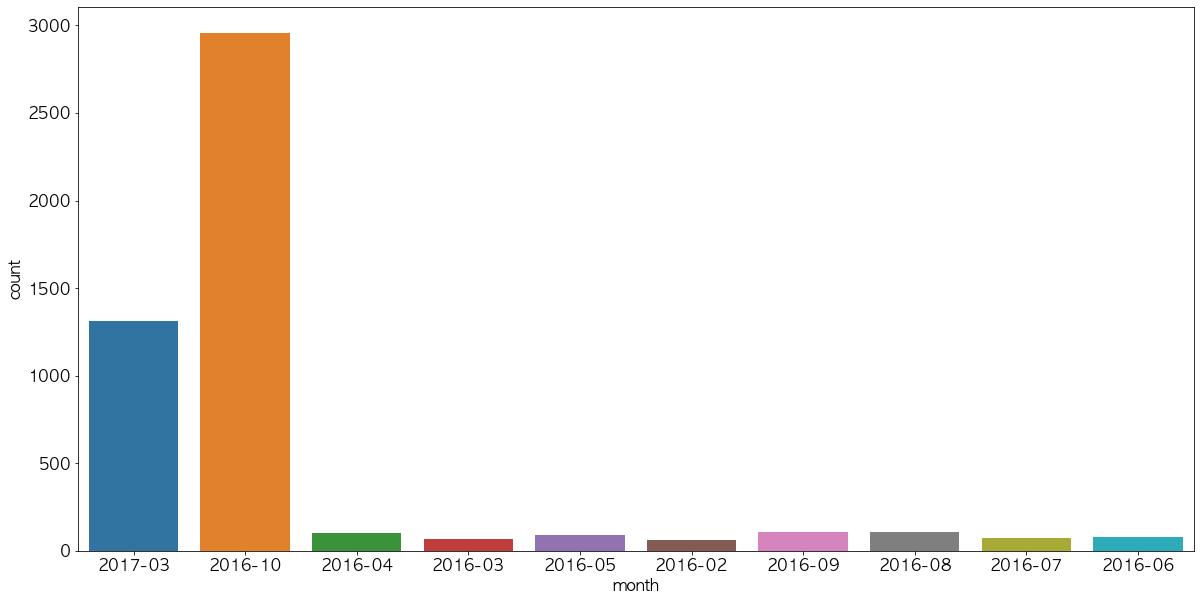

In [11]:
sns.countplot(data=df, x='month')
plt.show()

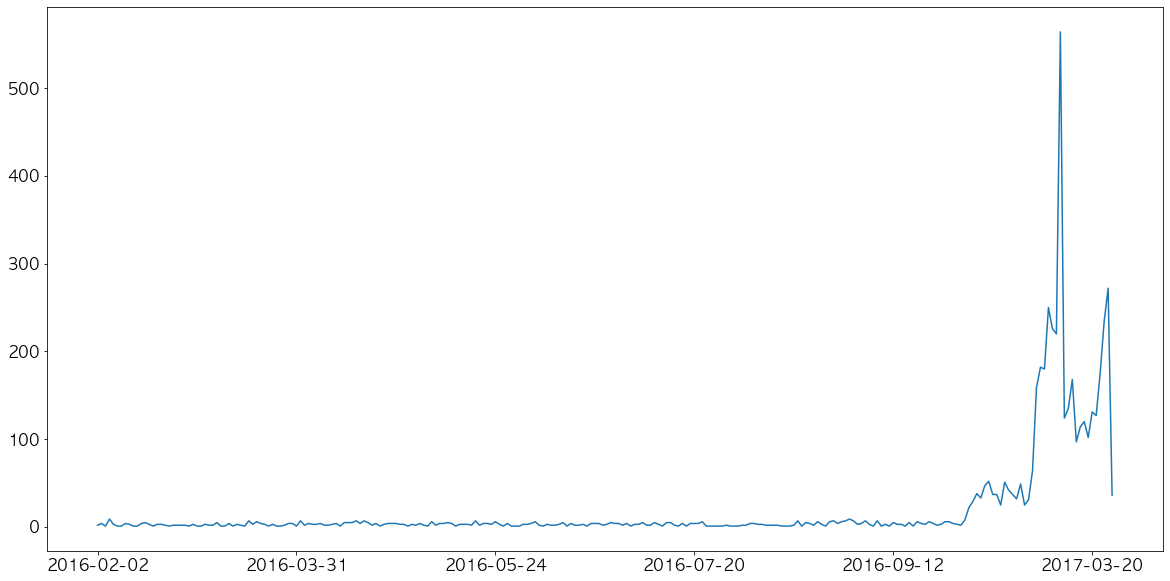

In [12]:
# 일별 거래 횟수를 시각화한다.
df_day = df['create_date'].str[:10]
a1 = df_day.value_counts()
a1.sort_index(inplace=True)
a1.plot()
plt.show()

### 가격 분포

In [13]:
# 가격을 확인한다.
df['price'].value_counts()

300000.0     192
400000.0     190
350000.0     186
100000.0     179
450000.0     171
            ... 
188000.0       1
185000.0       1
808000.0       1
139000.0       1
1500000.0      1
Name: price, Length: 169, dtype: int64

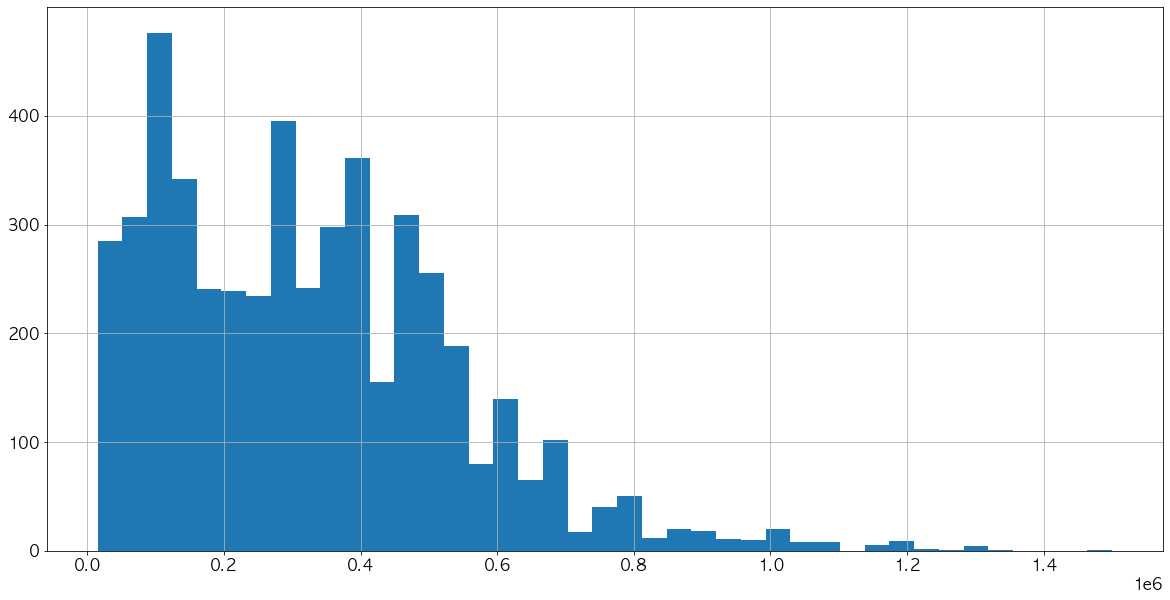

In [14]:
# 가격 분포를 확인한다.
df['price'].hist(bins='auto')
plt.show()

### 출고가

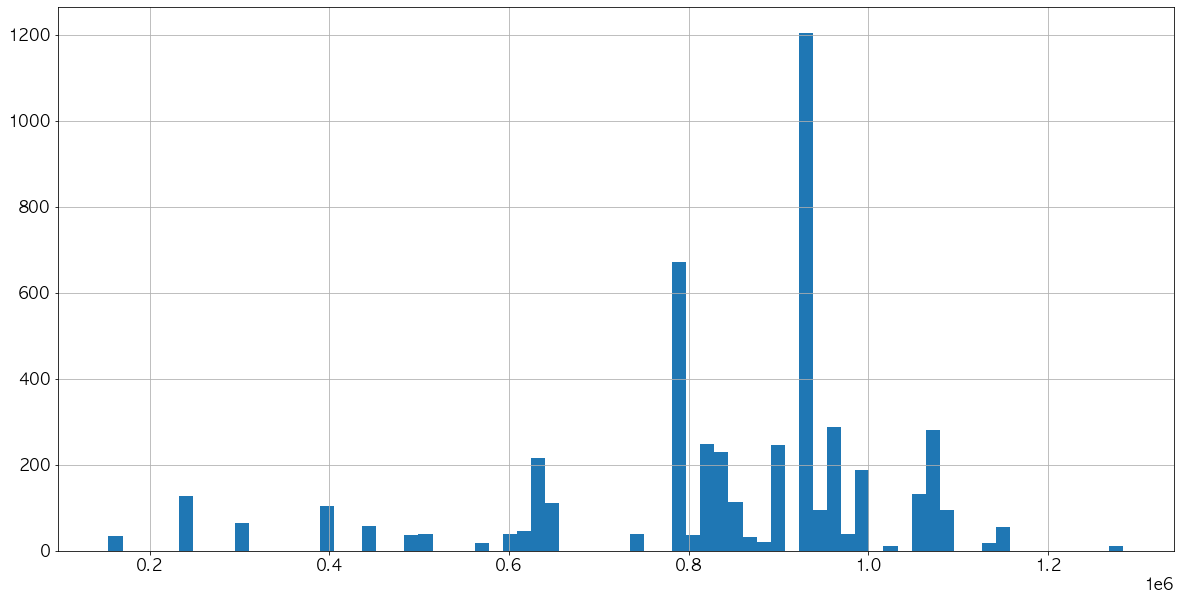

In [15]:
# 출고가의 분포를 확인한다.
df['factory_price'].hist(bins='auto')
plt.show()

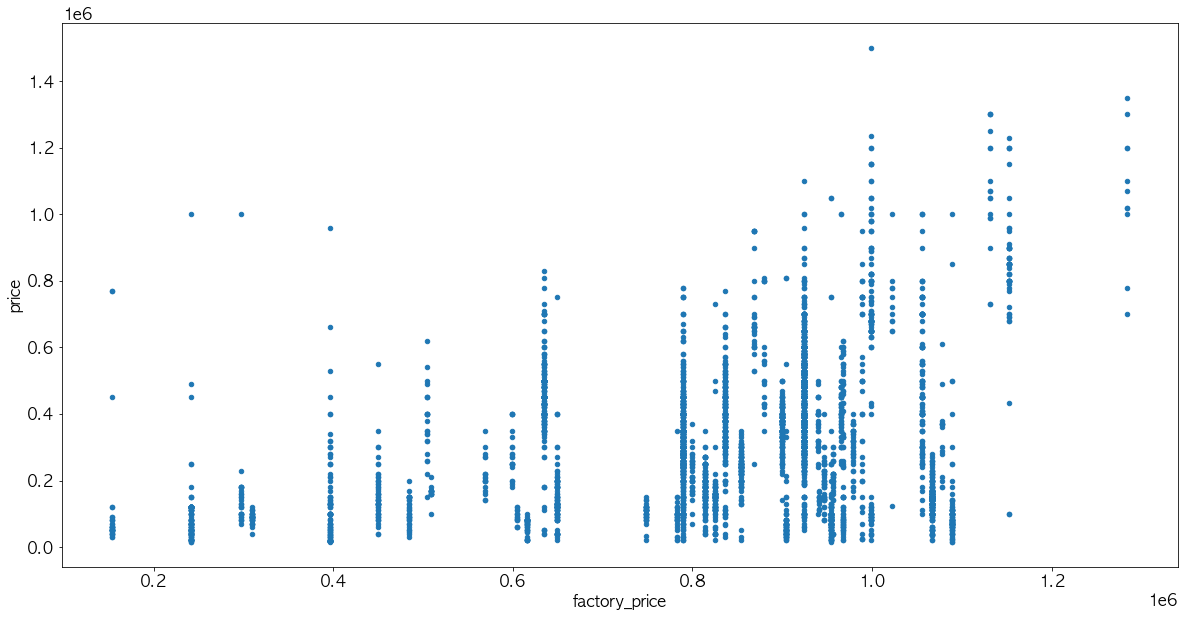

In [16]:
# 출고가와 중고가를 이용해 산점도를 그려본다.
df.plot.scatter(x='factory_price', y='price')
plt.show()

### 휴대폰 모델

In [17]:
# 기종별 데이터의 개수를 집계한다.
model_counts = df['phone_model'].value_counts()
model_counts

iphone 6 64gb          1002
iphone 6 16gb           591
galaxy note3 32gb       231
iphone se 64gb          216
galaxy note5 32gb       167
                       ... 
iphone 7 plus 32gb       12
iphone 6s Plus 16gb      12
iphone 4s 16gb           11
iphone 7 plus 256gb      11
iphone 6 32gb            10
Name: phone_model, Length: 64, dtype: int64

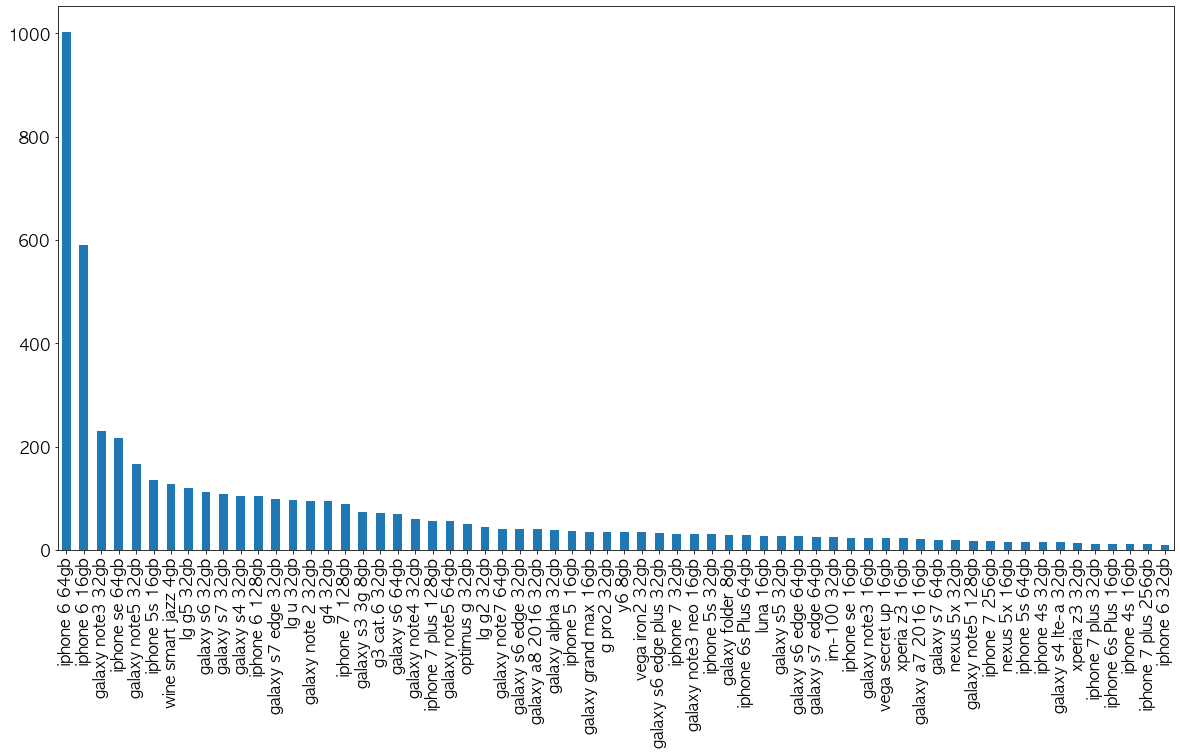

In [18]:
model_counts.plot.bar()
plt.show()

### 제조사

In [19]:
maker_counts = df['maker'].value_counts()
maker_counts

apple      2450
samsung    1642
lg          677
pantech      57
sony         37
huawei       35
tg           28
sky          25
Name: maker, dtype: int64

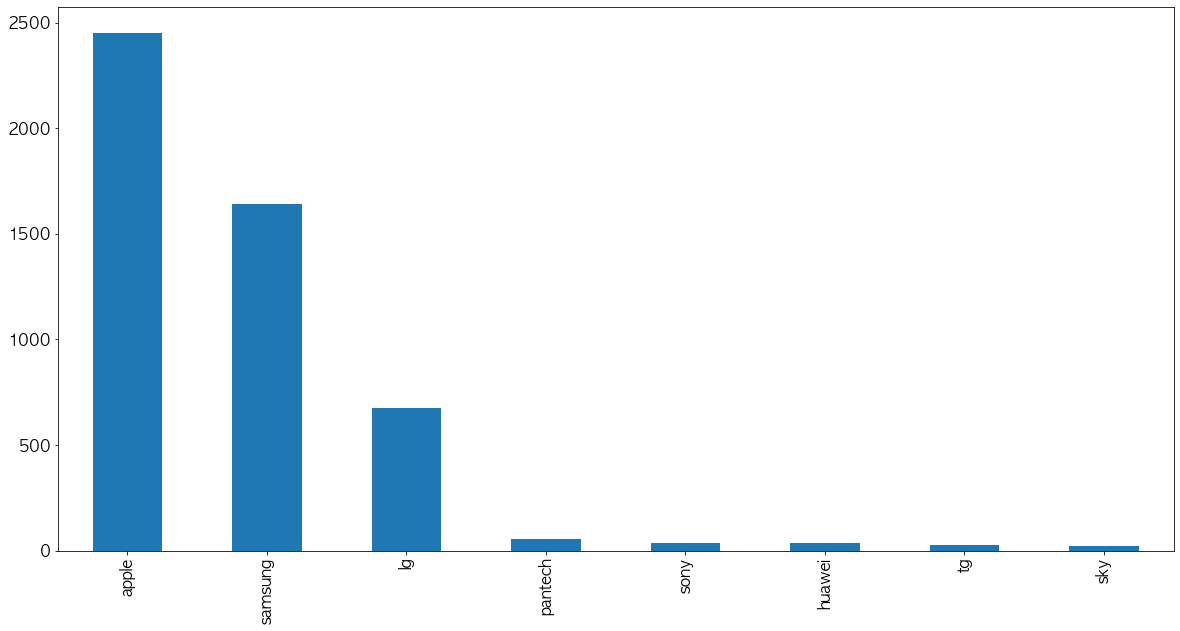

In [20]:
maker_counts.plot.bar()
plt.show()

### price_index

In [22]:
temp = df['price_index'].value_counts()
temp

103.05    3061
95.96     1311
102.59     448
94.90      131
Name: price_index, dtype: int64

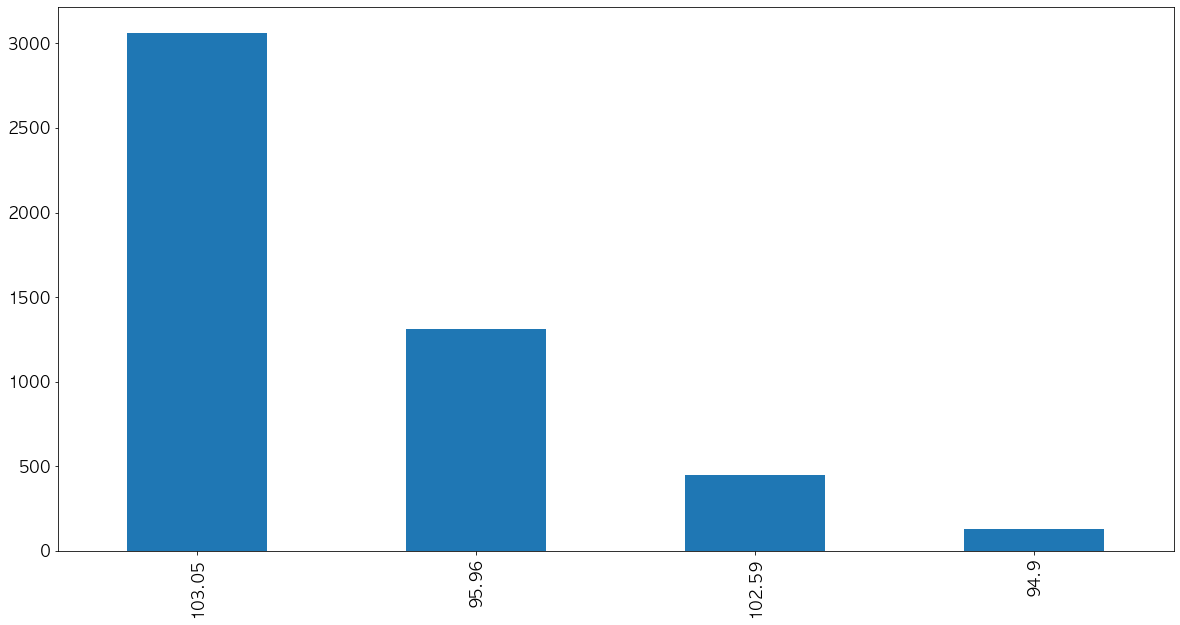

In [23]:
temp.plot.bar()
plt.show()

In [24]:
df = df[['price', 'phone_model', 'factory_price', 'maker', 'price_index', 
         'month']]
df

,price,phone_model,factory_price,maker,price_index,month
0,550000.0,iphone 6 64gb,924000,apple,95.96,2017-03
1,380000.0,galaxy s6 edge 32gb,979000,samsung,103.05,2016-10
2,300000.0,galaxy s6 32gb,854000,samsung,103.05,2016-10
3,290000.0,lg g5 32gb,836000,lg,95.96,2017-03
4,280000.0,lg u 32gb,396000,lg,102.59,2016-04
...,...,...,...,...,...,...
4946,1300000.0,iphone 7 plus 256gb,1283700,apple,103.05,2016-10
4947,1300000.0,iphone 7 256gb,1130800,apple,103.05,2016-10
4948,1300000.0,iphone 7 256gb,1130800,apple,103.05,2016-09
4949,1350000.0,iphone 7 plus 256gb,1283700,apple,103.05,2016-10
